# Single-Task Learning on Cifar10 Dataset (10 Classes): A CNN Approach
- **Name**: Minh T. Nguyen & Peter Chen.
- **ECE 6524** - Final Project.
- **Date**: 4/18/2023.
- **Objective**: Build a Single Task CNN model using ResNet152 architecture for 10-classes image classification on Cifar10.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import np_utils, plot_model
from keras.layers import Input, Dropout, Flatten, Dense
from keras.applications.resnet import ResNet152, preprocess_input
from keras import Model, Sequential

# 1. Data Visualization & Preprocessing

In [2]:
num_classes = 10          # number of classes
input_shape = (32, 32, 3) # original input image size

In [3]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


## 1.1. Data Visualization

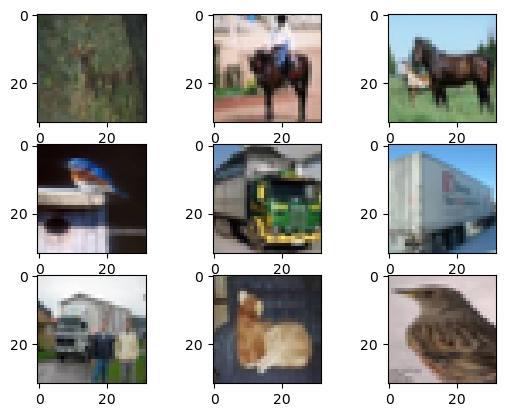

In [5]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Data Preprocessing

In [6]:
# normalize input data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [7]:
# convert class into one hot encoder
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


# 2. Modeling
**Note**: Build a sequential model using ResNet152 architecture

In [8]:
# Define ResNet152 CNN model
def create_model(dropout):
    input_shape = (32, 32, 3)
    
    resnet152_base = ResNet152(weights=None, include_top=False, input_shape=input_shape)
    
    model = Sequential()
    
    model.add(resnet152_base)
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               1

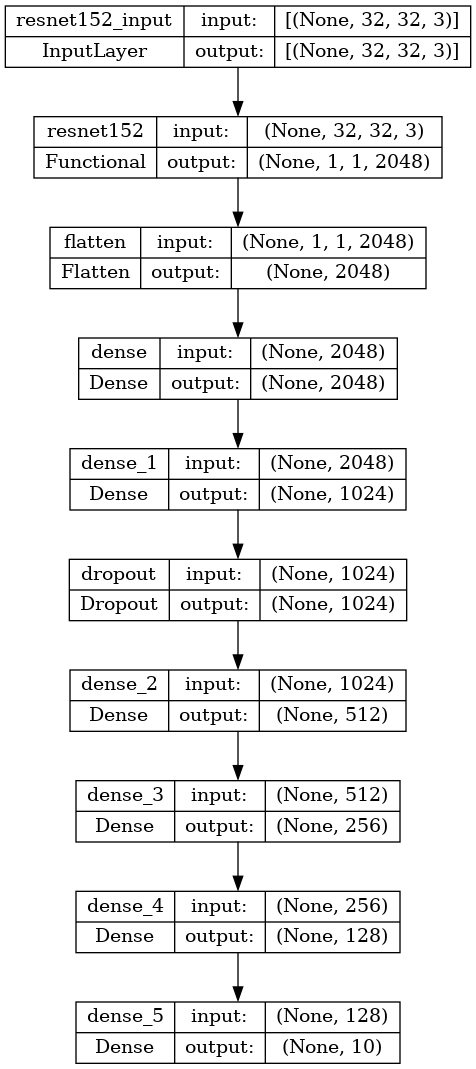

In [9]:
# display and plot model
model = create_model(0)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# define number of epochs
epochs = 20

# 2.1 Model 1 (Batch Size = 128, Dropout = 0, Optimizer = Adam)


In [11]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'Adam'

model_1 = create_model(dropout)

In [12]:
# compile model
model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
# train model
history_1 = model_1.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 161s 154ms/step - loss: 2.1273 - accuracy: 0.1800 - val_loss: 2.1069 - val_accuracy: 0.1795
Epoch 2/20
333/333 [==============================] - 46s 137ms/step - loss: 1.7950 - accuracy: 0.2917 - val_loss: 2.2018 - val_accuracy: 0.2380
Epoch 3/20
333/333 [==============================] - 46s 137ms/step - loss: 1.6487 - accuracy: 0.3606 - val_loss: 2.0311 - val_accuracy: 0.3341
Epoch 4/20
333/333 [==============================] - 46s 138ms/step - loss: 1.6148 - accuracy: 0.3811 - val_loss: 1.6635 - val_accuracy: 0.3748
Epoch 5/20
333/333 [==============================] - 46s 138ms/step - loss: 1.4124 - accuracy: 0.4738 - val_loss: 1.4753 - val_accuracy: 0.4708
Epoch 6/20
333/333 [==============================] - 46s 138ms/step - loss: 1.2706 - accuracy: 0.5388 - val_loss: 1.4362 - val_accuracy: 0.5115
Epoch 7/20
333/333 [==============================] - 46s 137ms/step - loss: 1.2372 - accuracy: 0.5572 - val_loss: 1.9261 - val_a

In [14]:
# train model results
print('Train Loss:', history_1.history['loss'][-1])
print('Train Acc:', history_1.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_1.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.0299460887908936
Train Acc: 0.6444470882415771

Test Loss: 1.0018373727798462
Test Acc: 0.6636999845504761


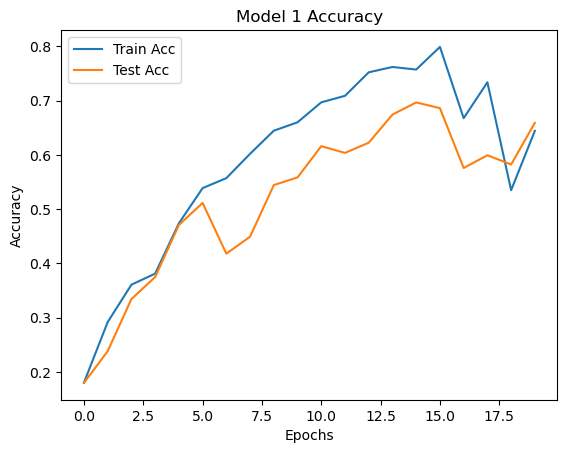

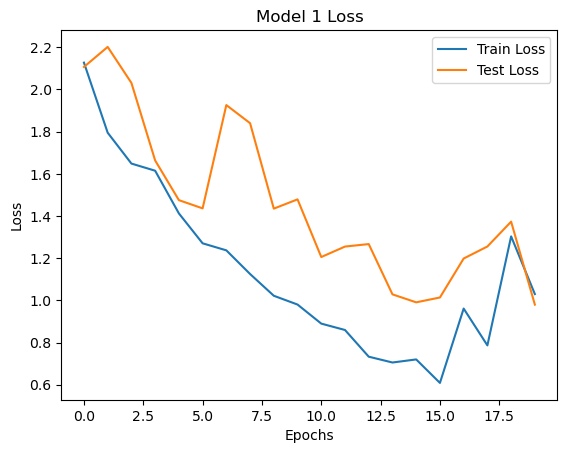

In [15]:
# Accuracy Plot
plt.plot(history_1.history['accuracy'], label='Train Acc')
plt.plot(history_1.history['val_accuracy'], label='Test Acc')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.2 Model 2 (Batch Size = 64, Dropout = 0, Optimizer = Adam)

In [16]:
# define parameters and generate model
batch_size = 64
dropout = 0
optimizer = 'Adam'

model_2 = create_model(dropout)

In [17]:
# compile model
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
# train model
history_2 = model_2.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 191s 130ms/step - loss: 2.0251 - accuracy: 0.2089 - val_loss: 2.0658 - val_accuracy: 0.2433
Epoch 2/20
665/665 [==============================] - 83s 125ms/step - loss: 1.6683 - accuracy: 0.3493 - val_loss: 1.8199 - val_accuracy: 0.3491
Epoch 3/20
665/665 [==============================] - 85s 127ms/step - loss: 1.6479 - accuracy: 0.3760 - val_loss: 1.7506 - val_accuracy: 0.3429
Epoch 4/20
665/665 [==============================] - 83s 126ms/step - loss: 1.5586 - accuracy: 0.4182 - val_loss: 3.6407 - val_accuracy: 0.2348
Epoch 5/20
665/665 [==============================] - 85s 127ms/step - loss: 1.4859 - accuracy: 0.4541 - val_loss: 2.2131 - val_accuracy: 0.3893
Epoch 6/20
665/665 [==============================] - 85s 127ms/step - loss: 1.3752 - accuracy: 0.5034 - val_loss: 2.2294 - val_accuracy: 0.2935
Epoch 7/20
665/665 [==============================] - 85s 128ms/step - loss: 1.3576 - accuracy: 0.5094 - val_loss: 1.5377 - val_a

In [19]:
# train model results
print('Train Loss:', history_2.history['loss'][-1])
print('Train Acc:', history_2.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_2.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.147019624710083
Train Acc: 0.5940706133842468

Test Loss: 1.2184745073318481
Test Acc: 0.5698999762535095


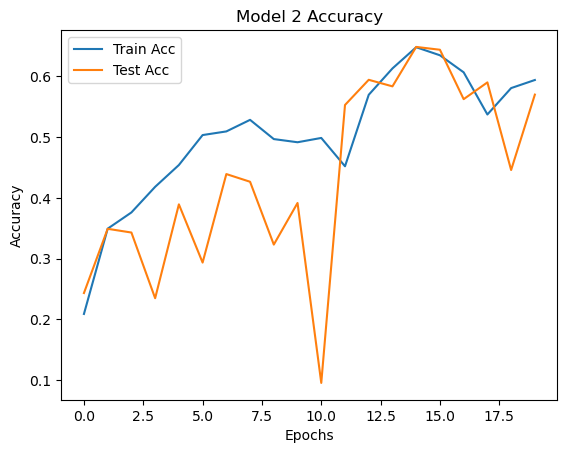

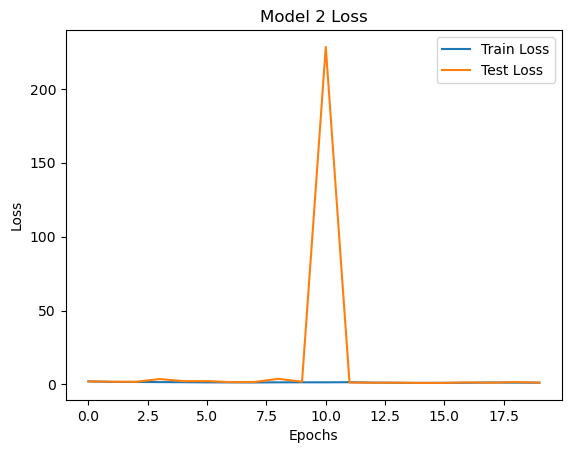

In [20]:
# Accuracy Plot
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Test Acc')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.3 Model 3 (Batch Size = 64, Dropout = 0.4, Optimizer = Adam)

In [21]:
# define parameters and generate model
batch_size = 64
dropout = 0.4
optimizer = 'Adam'

model_3 = create_model(dropout)

In [22]:
# compile model
model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
# train model
history_3 = model_3.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 190s 132ms/step - loss: 2.0966 - accuracy: 0.1750 - val_loss: 2.7845 - val_accuracy: 0.1560
Epoch 2/20
665/665 [==============================] - 86s 129ms/step - loss: 1.8420 - accuracy: 0.2632 - val_loss: 2.4276 - val_accuracy: 0.2153
Epoch 3/20
665/665 [==============================] - 85s 127ms/step - loss: 1.7257 - accuracy: 0.3243 - val_loss: 1.6308 - val_accuracy: 0.3808
Epoch 4/20
665/665 [==============================] - 86s 129ms/step - loss: 1.4835 - accuracy: 0.4371 - val_loss: 1.4358 - val_accuracy: 0.4632
Epoch 5/20
665/665 [==============================] - 85s 128ms/step - loss: 1.3545 - accuracy: 0.5076 - val_loss: 1.4608 - val_accuracy: 0.4988
Epoch 6/20
665/665 [==============================] - 86s 129ms/step - loss: 1.2237 - accuracy: 0.5645 - val_loss: 1.4243 - val_accuracy: 0.5349
Epoch 7/20
665/665 [==============================] - 86s 130ms/step - loss: 1.1260 - accuracy: 0.6158 - val_loss: 1.3374 - val_a

In [24]:
# train model results
print('Train Loss:', history_3.history['loss'][-1])
print('Train Acc:', history_3.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_3.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.685459315776825
Train Acc: 0.7775999903678894

Test Loss: 2.033031940460205
Test Acc: 0.5443000197410583


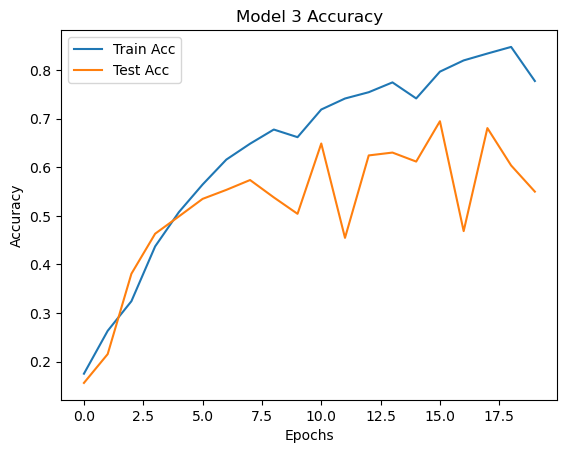

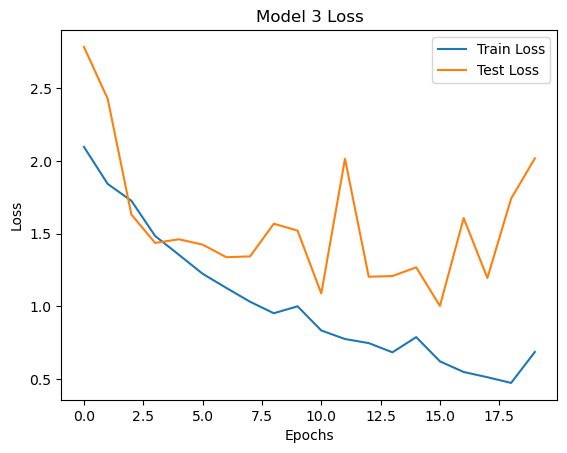

In [25]:
# Accuracy Plot
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Test Acc')
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Test Loss')
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.4 Model 4 (Batch Size = 128, Dropout = 0, Optimizer = SGD)

In [26]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'SGD'

model_4 = create_model(dropout)

In [27]:
# compile model
model_4.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [28]:
# train model
history_4 = model_4.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 93s 142ms/step - loss: 2.1124 - accuracy: 0.2100 - val_loss: 417935136.0000 - val_accuracy: 0.0999
Epoch 2/20
333/333 [==============================] - 44s 132ms/step - loss: 1.8825 - accuracy: 0.3012 - val_loss: 13.1959 - val_accuracy: 0.1007
Epoch 3/20
333/333 [==============================] - 44s 132ms/step - loss: 1.7281 - accuracy: 0.3577 - val_loss: 6.2392 - val_accuracy: 0.1327
Epoch 4/20
333/333 [==============================] - 44s 131ms/step - loss: 1.6148 - accuracy: 0.4068 - val_loss: 2.8603 - val_accuracy: 0.1184
Epoch 5/20
333/333 [==============================] - 44s 132ms/step - loss: 1.5221 - accuracy: 0.4390 - val_loss: 2.4571 - val_accuracy: 0.1824
Epoch 6/20
333/333 [==============================] - 44s 132ms/step - loss: 1.4328 - accuracy: 0.4763 - val_loss: 6.8479 - val_accuracy: 0.1800
Epoch 7/20
333/333 [==============================] - 45s 134ms/step - loss: 1.4300 - accuracy: 0.4799 - val_loss: 2.2504

In [29]:
# train model results
print('Train Loss:', history_4.history['loss'][-1])
print('Train Acc:', history_4.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_4.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.7782303094863892
Train Acc: 0.728141188621521

Test Loss: 2.670790910720825
Test Acc: 0.3012000024318695


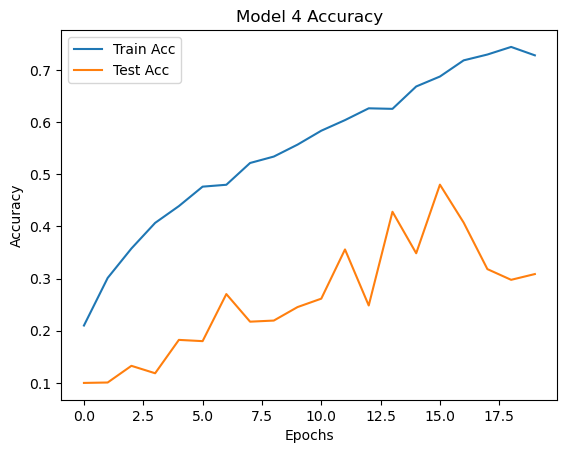

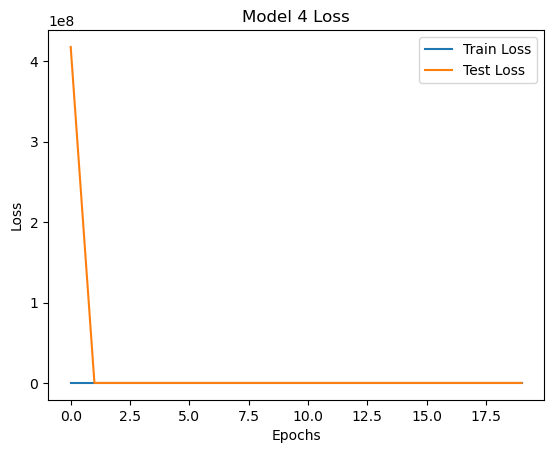

In [30]:
# Accuracy Plot
plt.plot(history_4.history['accuracy'], label='Train Acc')
plt.plot(history_4.history['val_accuracy'], label='Test Acc')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Test Loss')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.5 Model 5 (Batch Size = 64, Dropout = 0, Optimizer = SGD)

In [31]:
# define parameters and generate model
batch_size = 64
dropout = 0
optimizer = 'SGD'

model_5 = create_model(dropout)

In [32]:
# compile model
model_5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
# train model
history_5 = model_5.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 129s 125ms/step - loss: 2.0137 - accuracy: 0.2422 - val_loss: 8639.5596 - val_accuracy: 0.0999
Epoch 2/20
665/665 [==============================] - 79s 119ms/step - loss: 1.7799 - accuracy: 0.3408 - val_loss: 2.4405 - val_accuracy: 0.1240
Epoch 3/20
665/665 [==============================] - 80s 120ms/step - loss: 1.5967 - accuracy: 0.4105 - val_loss: 3.7652 - val_accuracy: 0.0865
Epoch 4/20
665/665 [==============================] - 80s 120ms/step - loss: 1.5649 - accuracy: 0.4240 - val_loss: 2.6053 - val_accuracy: 0.1153
Epoch 5/20
665/665 [==============================] - 79s 119ms/step - loss: 1.5037 - accuracy: 0.4453 - val_loss: 2.0193 - val_accuracy: 0.2504
Epoch 6/20
665/665 [==============================] - 81s 122ms/step - loss: 1.3879 - accuracy: 0.4931 - val_loss: 1.9381 - val_accuracy: 0.3233
Epoch 7/20
665/665 [==============================] - 80s 120ms/step - loss: 1.2957 - accuracy: 0.5308 - val_loss: 1.6936 - va

In [34]:
# train model results
print('Train Loss:', history_5.history['loss'][-1])
print('Train Acc:', history_5.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_5.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.7019131183624268
Train Acc: 0.7577411532402039

Test Loss: 7.316009998321533
Test Acc: 0.1914999932050705


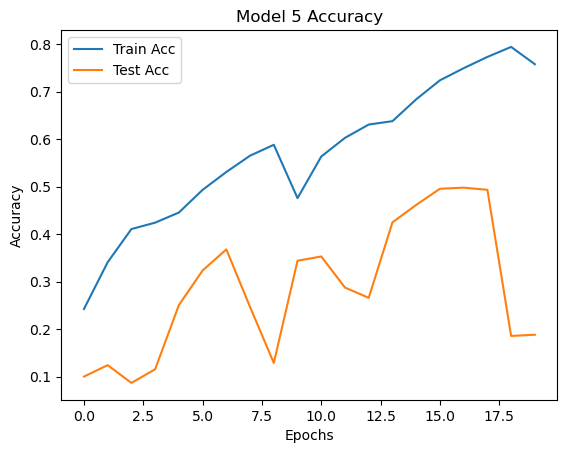

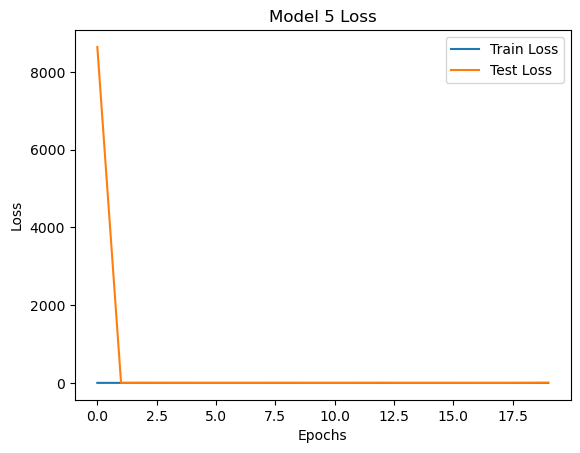

In [35]:
# Accuracy Plot
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Test Acc')
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_5.history['loss'], label='Train Loss')
plt.plot(history_5.history['val_loss'], label='Test Loss')
plt.title('Model 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.6 Model 6 (Batch Size = 64, Dropout = 0.4, Optimizer = SGD)

In [36]:
# define parameters and generate model
batch_size = 64
dropout = 0.4
optimizer = 'SGD'

model_6 = create_model(dropout)

In [37]:
# compile model
model_6.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [38]:
# train model
history_6 = model_6.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 128s 127ms/step - loss: 2.0375 - accuracy: 0.2300 - val_loss: 2.4337 - val_accuracy: 0.1709
Epoch 2/20
665/665 [==============================] - 80s 120ms/step - loss: 1.7821 - accuracy: 0.3286 - val_loss: 2.4656 - val_accuracy: 0.1536
Epoch 3/20
665/665 [==============================] - 80s 121ms/step - loss: 1.6286 - accuracy: 0.3988 - val_loss: 2.6187 - val_accuracy: 0.1028
Epoch 4/20
665/665 [==============================] - 81s 122ms/step - loss: 1.5615 - accuracy: 0.4261 - val_loss: 5271647.0000 - val_accuracy: 0.0984
Epoch 5/20
665/665 [==============================] - 80s 121ms/step - loss: 1.9206 - accuracy: 0.3036 - val_loss: 16.8855 - val_accuracy: 0.1421
Epoch 6/20
665/665 [==============================] - 80s 120ms/step - loss: 1.7589 - accuracy: 0.3566 - val_loss: 1.9896 - val_accuracy: 0.2809
Epoch 7/20
665/665 [==============================] - 80s 121ms/step - loss: 1.6078 - accuracy: 0.4145 - val_loss: 2.4728 

In [39]:
# train model results
print('Train Loss:', history_6.history['loss'][-1])
print('Train Acc:', history_6.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_6.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 0.9487060904502869
Train Acc: 0.6664941310882568

Test Loss: 3.8250246047973633
Test Acc: 0.21539999544620514


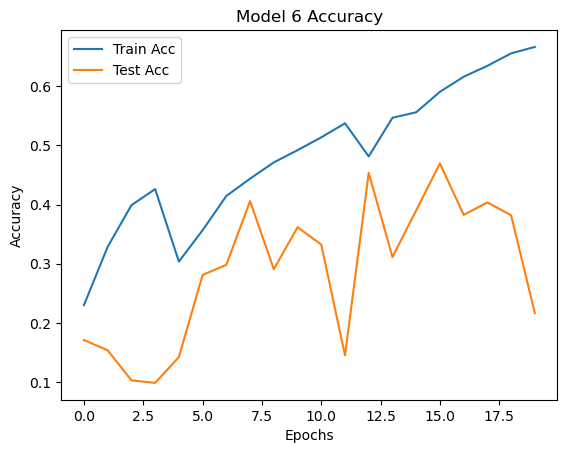

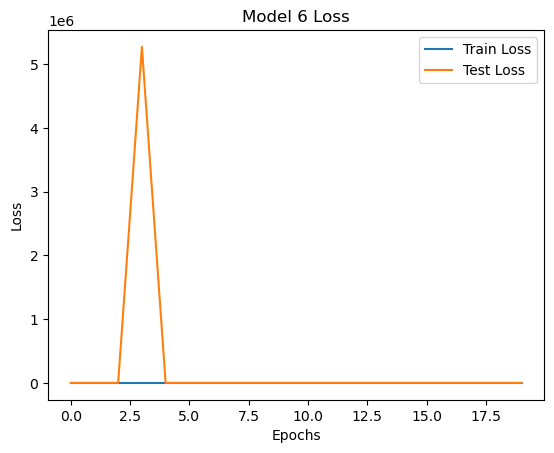

In [40]:
# Accuracy Plot
plt.plot(history_6.history['accuracy'], label='Train Acc')
plt.plot(history_6.history['val_accuracy'], label='Test Acc')
plt.title('Model 6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Test Loss')
plt.title('Model 6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()